# Tarea 2

## Integrantes

    - Karla Paola Reyo Olan
    - Rene Roldan Correa
    
1.- Importar y explorar los datos:
<br>

In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importar los archivos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<br>
### Exploracion de los datos:
<br>

In [28]:
# descripcion de los df
print("\nDataset de Entrenamiento\n")
print("El número de columnas es "+str(train.shape[1]))
print("El total de observaciones es de "+str(train.shape[0]) + '\n')
print("Dataset de Prueba")
print("El total de observaciones en el dataset de entrenamineto es de "+str(test.shape[0]))
print("Nuestros datos se ven así: ")
train.head(3)


Dataset de Entrenamiento

El número de columnas es 13
El total de observaciones es de 614

Dataset de Prueba
El total de observaciones en el dataset de entrenamineto es de 367
Nuestros datos se ven así: 


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### Obtenemos e imputamos los nulos del dataset de entrenamiento

In [39]:
# obtener e imputar nulos
def num_nulos(x):
    return x.isnull().sum()

print("\nTenemos "+str(train.apply(num_nulos, axis=1).sum())+" columnas con nulos")
print("Número de Nas por fila: ")
train.apply(num_nulos, axis=1)

print("\n")
print("Número de Nas por columna: ")
train.apply(num_nulos, axis=0)

train_na = train.dropna()
print("Verificamos que no tenemos nulos \n")
train_na.info()


Tenemos 149 columnas con nulos
Número de Nas por fila: 


Número de Nas por columna: 
Verificamos que no tenemos nulos 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


### Generacion de variables dummy a partir de las categoricas

In [40]:
# hacemos variables dummies de las categoricas
variables = list(train_na.select_dtypes(include=['object']).columns)
variables.remove('Loan_ID') 
aux = pd.get_dummies(train_na[variables])
aux2 = train_na.drop(columns=variables, axis=1)

train_dummies = pd.merge(aux2, aux, left_index=True, right_index=True)
train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 23 columns):
Loan_ID                    480 non-null object
ApplicantIncome            480 non-null int64
CoapplicantIncome          480 non-null float64
LoanAmount                 480 non-null float64
Loan_Amount_Term           480 non-null float64
Credit_History             480 non-null float64
Gender_Female              480 non-null uint8
Gender_Male                480 non-null uint8
Married_No                 480 non-null uint8
Married_Yes                480 non-null uint8
Dependents_0               480 non-null uint8
Dependents_1               480 non-null uint8
Dependents_2               480 non-null uint8
Dependents_3+              480 non-null uint8
Education_Graduate         480 non-null uint8
Education_Not Graduate     480 non-null uint8
Self_Employed_No           480 non-null uint8
Self_Employed_Yes          480 non-null uint8
Property_Area_Rural        480 non-null uint8
Property_Are

In [ ]:
### resumen y observaciones por variable categorica

In [41]:
print("Acontinuación tenemos el resumen por variable")
train_na.describe()
print("\n")
print("Para nuestras variables categóricas tenemos los siguientes valores por columna")
for col_name in variables:    
    cuenta = train_na[col_name].value_counts()
    print("La columna "+str(col_name)+" tiene los siguientes valores \n"+str(cuenta))

Acontinuación tenemos el resumen por variable


Para nuestras variables categóricas tenemos los siguientes valores por columna
La columna Gender tiene los siguientes valores 
Male      394
Female     86
Name: Gender, dtype: int64
La columna Married tiene los siguientes valores 
Yes    311
No     169
Name: Married, dtype: int64
La columna Dependents tiene los siguientes valores 
0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64
La columna Education tiene los siguientes valores 
Graduate        383
Not Graduate     97
Name: Education, dtype: int64
La columna Self_Employed tiene los siguientes valores 
No     414
Yes     66
Name: Self_Employed, dtype: int64
La columna Property_Area tiene los siguientes valores 
Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64
La columna Loan_Status tiene los siguientes valores 
Y    332
N    148
Name: Loan_Status, dtype: int64


### Tablas cruzadas

In [42]:
# tablas cruzadas con porcentaje
pd.crosstab(train_na["Gender"],train_na["Loan_Status"],margins=True)    
pd.crosstab(train_na["Gender"],train_na["Loan_Status"],margins=True).apply(lambda r: r/r.sum(), axis=1)
pd.crosstab(train_na["Credit_History"],train_na["Loan_Status"],margins=True)
pd.crosstab(train_na["Credit_History"],train_na["Loan_Status"],margins=True).apply(lambda r: r/r.sum(), axis=1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.450000,0.050000,0.5
1.0,0.103659,0.396341,0.5
All,0.154167,0.345833,0.5


# Analisis de los Resultados

Text(0.5,1,'Ingreso de la persona')

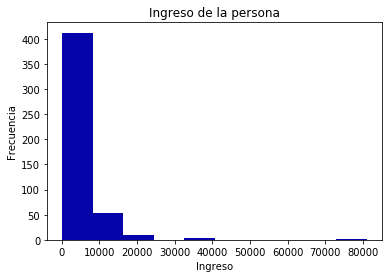

In [44]:
plt.hist(train_na["ApplicantIncome"],color='#0504aa')
#plt.grid(axis='y', alpha=0.75)
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.title('Ingreso de la persona')

Analisis 1

Text(0.5,1,'Importe Prestado')

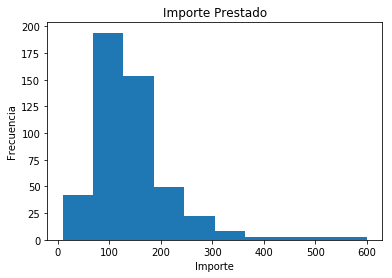

In [45]:
plt.hist(train_na["LoanAmount"])
plt.xlabel('Importe')
plt.ylabel('Frecuencia')
plt.title('Importe Prestado')

Analisis 2

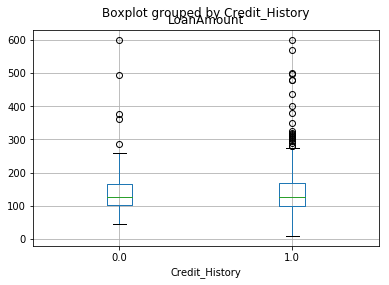

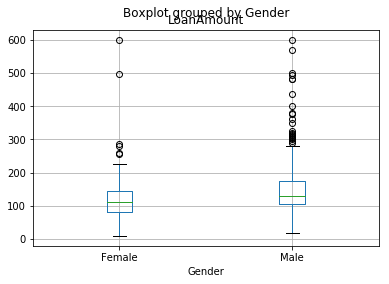

In [46]:
# boxplots
train_na.boxplot(column='LoanAmount',by='Credit_History')
train_na.boxplot(column='LoanAmount',by='Gender')

Analisis 3